<a href="https://colab.research.google.com/github/Sharnitha1410/Bigmart-colab/blob/main/bigmart_colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bigmart sales analysis

In [253]:
import numpy as np
import pandas as pd
#importing the required libraries for the Analysis of the project.

In [254]:
from google.colab import drive
drive.mount('/content/drive')
# Mount Google Drive to the Colab environment at '/content/drive' for file access

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Loading of Data

In [255]:
train = pd.read_csv('/content/Train.csv')
# import necessary libraries and load dataset.
# Read the CSV file 'Train.csv' from the specified path into a DataFrame named 'train'

In [256]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [257]:
test = pd.read_csv('/content/Test.csv')
# import necessary libraries and load dataset.
# Load the dataset 'Test.csv' from the specified path into a DataFrame named 'test'

Data structure and content


In [258]:
train.shape
# shape function Helps us identify how many rows and columns we have acoording to our data set.
# Display the dimensions (number of rows and columns) of the 'train' DataFrame

(8523, 12)

In [259]:
train.columns
# display coloumn names
# Display the names of the columns in the 'train' DataFrame
train.columns



Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [260]:
train.isnull().sum()
#display number of missing values of each column
# Display the number of missing values in each column of the 'train' DataFrame

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [261]:
train.dtypes
#display the data type of each column
# Display the data type of each column in the 'train' DataFrame

,0
Item_Identifier,object
Item_Weight,float64
Item_Fat_Content,object
Item_Visibility,float64
Item_Type,object
Item_MRP,float64
Outlet_Identifier,object
Outlet_Establishment_Year,int64
Outlet_Size,object
Outlet_Location_Type,object


In [262]:
train.duplicated()
# check for duplicated rows
# Check for duplicated rows in the 'train' DataFrame

,0
0,False
1,False
2,False
3,False
4,False
...,...
8518,False
8519,False
8520,False
8521,False


In [263]:
train.info()
#display information about the datasets
# Display summary information about the 'train' DataFrame, including data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [264]:
train.describe()
#display discriptive statistics
# Display descriptive statistics of the 'train' DataFrame, including count, mean, and standard deviation

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [265]:
train.head()
#display first few rows of the datasets
# Display the first few rows of the 'train' DataFrame

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [266]:
train['Item_Type'].value_counts()
#display value counts for 'Item_Type'
# Display the value counts of the 'Item_Type' column in the 'train' DataFrame

,count
Item_Type,
Fruits and Vegetables,1232
Snack Foods,1200
Household,910
Frozen Foods,856
Dairy,682
Canned,649
Baking Goods,648
Health and Hygiene,520
Soft Drinks,445


In [267]:
train['Item_Fat_Content'].value_counts()
()

()

In [268]:
test.shape
# shape function Helps us identify how many rows and columns we have acoording to our data set.
# Display the dimensions (number of rows and columns) of the 'test' DataFrame

(5681, 11)

In [269]:
test.columns
# display coloumn names
# Display the names of the columns in the 'test' DataFrame

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [270]:
test.isnull().sum()
#display number of missing values of each column
# Display the number of missing values for each column in the 'test' DataFrame

,0
Item_Identifier,0
Item_Weight,976
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,1606
Outlet_Location_Type,0


In [271]:
test.dtypes
#display the data type of each column
# Display the data type of each column in the 'test' DataFrame

,0
Item_Identifier,object
Item_Weight,float64
Item_Fat_Content,object
Item_Visibility,float64
Item_Type,object
Item_MRP,float64
Outlet_Identifier,object
Outlet_Establishment_Year,int64
Outlet_Size,object
Outlet_Location_Type,object


In [272]:
test.duplicated()
#check for duplicated rows
# Check for duplicated rows in the 'test' DataFrame

,0
0,False
1,False
2,False
3,False
4,False
...,...
5676,False
5677,False
5678,False
5679,False


In [273]:
test.info()
#display information about the datasets
# Display summary information about the 'test' DataFrame, including data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [274]:
test.describe()
#display discriptive statistics
# Display descriptive statistics of the 'test' DataFrame, including count, mean, and standard deviation

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [275]:
test.head()
#display first few rows of the datasets
# Display the first few rows of the 'test' DataFrame

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [276]:
test['Item_Type'].value_counts()
#display value counts for 'Item_Type'
# Display the value counts of the 'Item_Type' column in the 'test' DataFrame

,count
Item_Type,
Snack Foods,789
Fruits and Vegetables,781
Household,638
Frozen Foods,570
Dairy,454
Baking Goods,438
Canned,435
Health and Hygiene,338
Meat,311


In [277]:
test['Item_Fat_Content'].value_counts()
#display value counts for 'Item_Fat_Content'
# Display the value counts of the 'Item_Fat_Content' column in the 'test' DataFrame

,count
Item_Fat_Content,
Low Fat,3396
Regular,1935
LF,206
reg,78
low fat,66


#DATA STRUCTURE AND CONTENT

#DATA PREPROCESSING


In [278]:
train['Item_Fat_Content'].value_counts()
#display value counts for 'Item_Fat_Content'
# Display the count of unique values for the 'Item_Fat_Content' column in the 'train' DataFrame

,count
Item_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


In [279]:
# Replace variations of 'Low Fat' and 'Regular' in the 'Item_Fat_Content' column with standardized values
train['Item_Fat_Content'].replace(['LF','low fat','reg'],['Low Fat','Low Fat','Regular'],inplace=True)

In [280]:
 #Count the occurrences of each unique value in the 'Item_Fat_Content' column of the 'train' DataFrame
train['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


In [281]:
test['Item_Fat_Content'].value_counts()
#display updated value counts for 'Item_Fat_Content'
# Display the count of unique values for the 'Item_Fat_Content' column in the 'train' DataFrame

,count
Item_Fat_Content,
Low Fat,3396
Regular,1935
LF,206
reg,78
low fat,66


In [282]:
# Replace variations of 'Low Fat' and 'Regular' in the 'Item_Fat_Content' column with standardized values
test['Item_Fat_Content'].replace(['LF','low fat','reg'],['Low Fat','Low Fat','Regular'],inplace=True)

In [283]:
 #Count the occurrences of each unique value in the 'Item_Fat_Content' column of the 'train' DataFrame
test['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,3668
Regular,2013


#explaratory data analysis

Uni variate analysis

In [284]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors

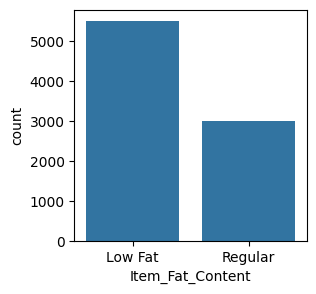

In [285]:
plt.figure(figsize=(3,3))
sns.countplot(x='Item_Fat_Content',data=train)
plt.xlabel('Item_Fat_Content')
plt.show()
# A countplot is a type of data visualization used in python.
# It is particularly useful for visualising the count occurences of each unique value.
# The sns.countplot function is used to create the count plot.
# The items have more low fat content

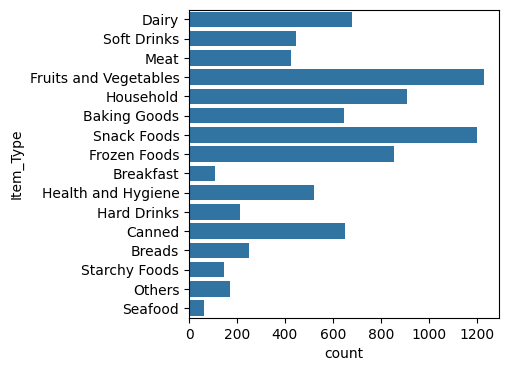

In [286]:
plt.figure(figsize=(4,4))
sns.countplot(y='Item_Type',data=train)
plt.ylabel('Item_Type')
plt.show()
# Create a horizontal count plot of 'Item_Type' from the 'train' DataFrame

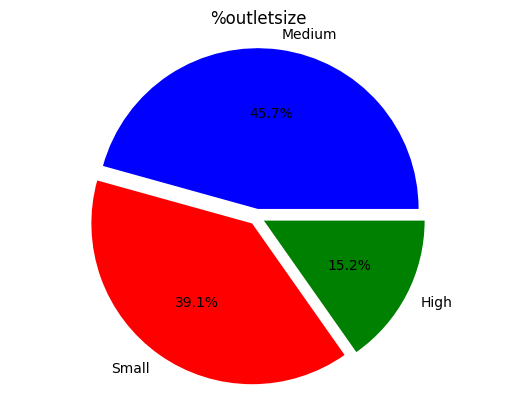

In [287]:
outletsize=train['Outlet_Size'].value_counts(normalize=True)*100
explode=(0.05,0.05,0.05)
colors=('blue','red','green')
plt.pie(outletsize,labels=outletsize.index,autopct='%1.1f%%',explode=explode,colors=colors)
plt.title('%outletsize')
plt.axis('equal')
plt.show()
# Create a pie chart to visualize the distribution of 'Outlet_Size' in the 'train' DataFrame

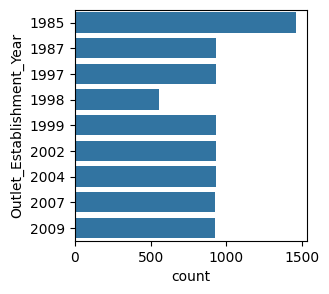

In [288]:
plt.figure(figsize=(3,3))
sns.countplot(y='Outlet_Establishment_Year',data=train)
plt.ylabel('Outlet_Establishment_Year')
plt.show()
# Create a vertical count plot of 'Outlet_Establishment_Year' from the 'train' DataFrame

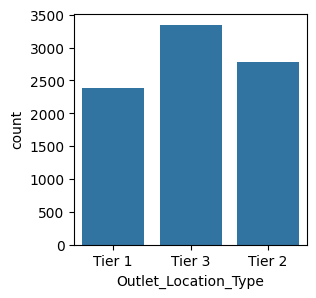

In [289]:
plt.figure(figsize=(3,3))
sns.countplot(x='Outlet_Location_Type',data=train)
plt.xlabel('Outlet_Location_Type')
plt.show()
# Create a horizontal count plot of 'Outlet_Location_Type' from the 'train' DataFrame

#To handle the Missing and catagorical values

In [290]:
#To handle the Missing and null values
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [291]:
# Coverting the labels into a numeric form using Label Encoder for the TRAIN SET.
le=LabelEncoder()
for col in train.columns:
   if train[col].dtype=='object':
      train[col]=le.fit_transform(train[col])

In [292]:
train['Outlet_Size'].dtypes
#display the data type of 'Outlet_Size' column

dtype('int64')

In [293]:
train.head()
#display updated few rows of the datasets

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,3,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [294]:
imputer=SimpleImputer(strategy='mean')
missing_coloums=['Item_Weight','Outlet_Size']
train[missing_coloums]=imputer.fit_transform(train[missing_coloums])

In [295]:
train.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


In [296]:
le=LabelEncoder()
for col in test.columns:
  if test[col].dtype=='object':
    test[col]=le.fit_transform(test[col])
    # Convert categorical columns to numerical using label encoding

In [297]:
test['Outlet_Size'].dtypes
#display the data type of 'Outlet_Size' column

dtype('int64')

In [298]:
test.head()
#display updated few rows of the datasets

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750,0,0.007565,13,107.8622,9,1999,1,0,1
1,1067,8.300,1,0.038428,4,87.3198,2,2007,3,1,1
2,1406,14.600,0,0.099575,11,241.7538,0,1998,3,2,0
3,809,7.315,0,0.015388,13,155.0340,2,2007,3,1,1
4,1184,NaN,1,0.118599,4,234.2300,5,1985,1,2,3


In [299]:
imputer=SimpleImputer(strategy='mean')
missing_coloums=['Item_Weight','Outlet_Size']
test[missing_coloums]=imputer.fit_transform(test[missing_coloums])

In [300]:
test.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


#handling the outliers


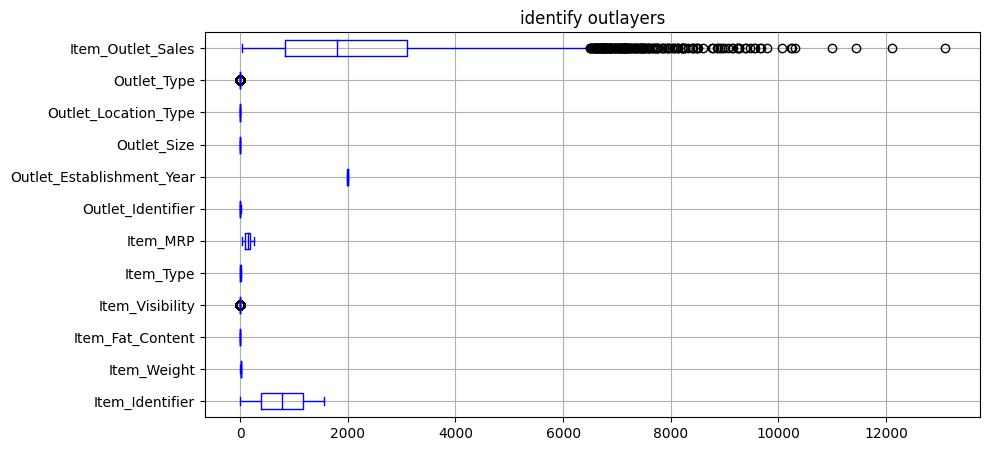

In [301]:
number_coloumns=train.select_dtypes(include=['int64','float64'])
fig,ax=plt.subplots(figsize=(10,5))
number_coloumns.boxplot(ax=ax,vert=False,color='blue')
plt.title('identify outlayers')
plt.show()
# Create a horizontal boxplot for numerical columns in the DataFrame to identify outliers

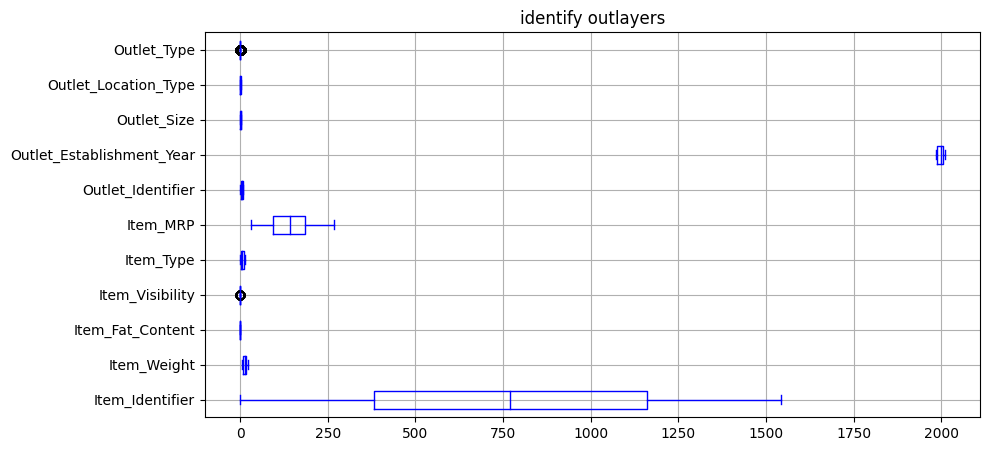

In [302]:
number_coloumns=test.select_dtypes(include=['int64','float64'])
fig,ax=plt.subplots(figsize=(10,5))
number_coloumns.boxplot(ax=ax,vert=False,color='blue')
plt.title('identify outlayers')
plt.show()
# Create a horizontal boxplot for numerical columns in the 'test' DataFrame to identify outliers


In [303]:
q1=np.percentile(train['Item_Outlet_Sales'],25)
q3=np.percentile(train['Item_Outlet_Sales'],75)
iqr=q3-q1
print('q1',q1)
print('q3',q3)
print('IQR',iqr)

q1 834.2474
q3 3101.2964
IQR 2267.049


In [304]:
upperlimit=q3+1.5*iqr
lowerlimit=q1-1.5*iqr
print('upperlimit',upperlimit)
print('lowerlimit',lowerlimit)
# Upper limit for outliers
# Lower limit for outliers

upperlimit 6501.8699
lowerlimit -2566.3261


Cube transformation


In [305]:
train['Outlet_Sales_Cube']=np.cbrt(train['Item_Outlet_Sales'])

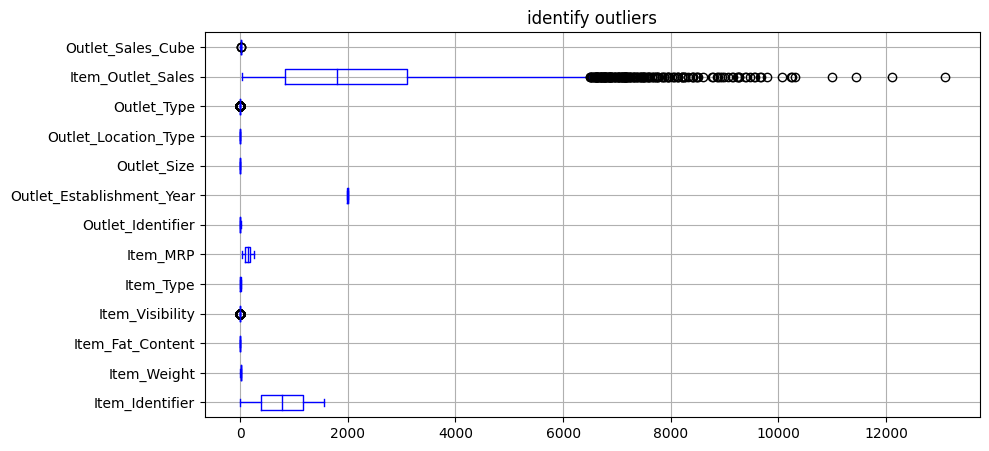

In [306]:
number_columns=train.select_dtypes(include=['int64','float64'])
fig,ax=plt.subplots(figsize=(10,5))
number_columns.boxplot(ax=ax,vert=False,color='blue')
plt.title('identify outliers')
plt.show()

In [307]:
# Computes the square root of the sales data.
train['Outlet_Sales_square']= np.sqrt(train['Item_Outlet_Sales'])

<ipython-input-308-c6c8accd872e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=train['Outlet_Sales_square'],kde=True,rug=True)


<Axes: xlabel='Outlet_Sales_square', ylabel='Density'>

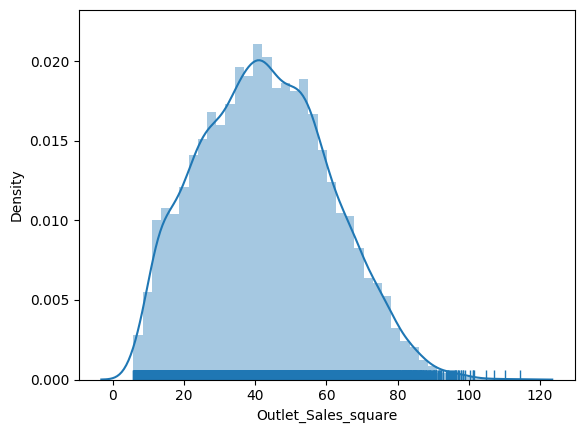

In [308]:
sns.distplot(a=train['Outlet_Sales_square'],kde=True,rug=True)
 #a=train['Outlet_Sales_square']: Specifies the data to be plotted, which in this case is the Outlet_Sales_square column from the train DataFrame.
#kde=True: Adds a Kernel Density Estimate (KDE) line to the plot, which represents the probability density function of the data.
#rug=True: Adds small vertical lines at the bottom of the plot for each data point, giving a sense of the distribution of individual data points.

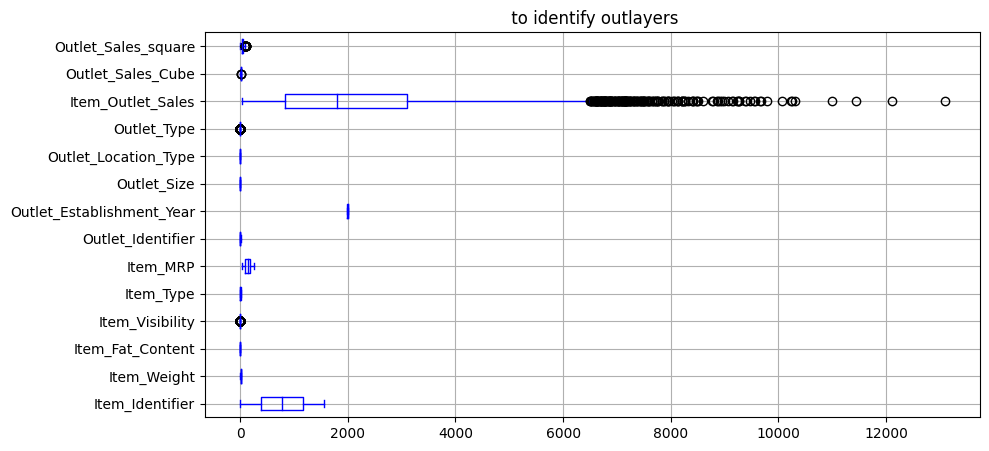

In [309]:
# Selects numerical columns from the DataFrame and plots a horizontal boxplot to help identify outliers.
number_coloumns=train.select_dtypes(include=['int64','float64'])
fig,ax=plt.subplots(figsize=(10,5))
number_coloumns.boxplot(ax=ax,vert=False,color='blue')
plt.title(' to identify outlayers')
plt.show()

Bi variate Analysis

<ipython-input-310-2c7d3778c2e2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=train['Item_Outlet_Sales'],kde=True ,rug=True)


<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

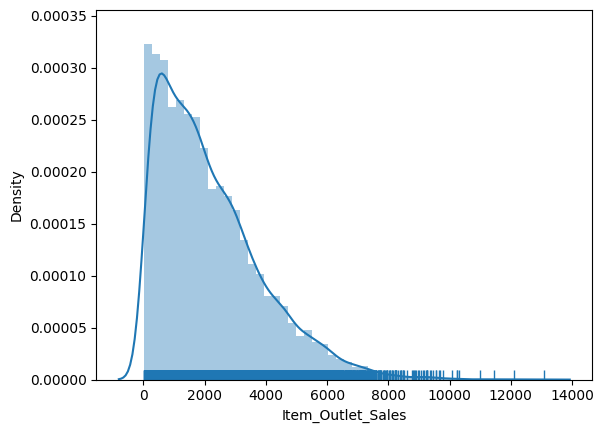

In [310]:
sns.distplot(a=train['Item_Outlet_Sales'],kde=True ,rug=True)

<ipython-input-311-ff648c963ffd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=train['Outlet_Sales_Cube'],kde=True ,rug=True)


<Axes: xlabel='Outlet_Sales_Cube', ylabel='Density'>

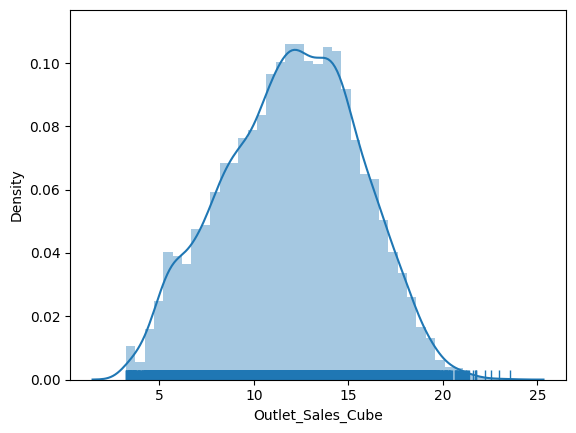

In [311]:
sns.distplot(a=train['Outlet_Sales_Cube'],kde=True ,rug=True)
# Plotting the distribution of the 'Outlet_Sales_Cube' column

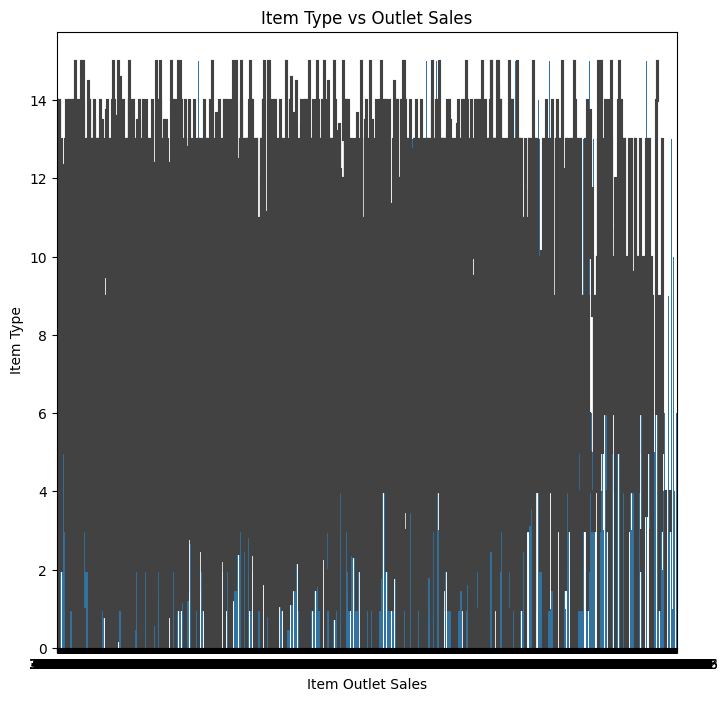

In [312]:
# Set the size of the figure
plt.figure(figsize=(8,8))

# Create a bar plot with 'Item_Outlet_Sales' on the x-axis and 'Item_Type' on the y-axis
sns.barplot(x='Item_Outlet_Sales', y='Item_Type', data=train).set(title='Item Type vs Outlet Sales')

# Set the labels for the x and y axes
plt.xlabel('Item Outlet Sales')
plt.ylabel('Item Type')

# Display the plot
plt.show()

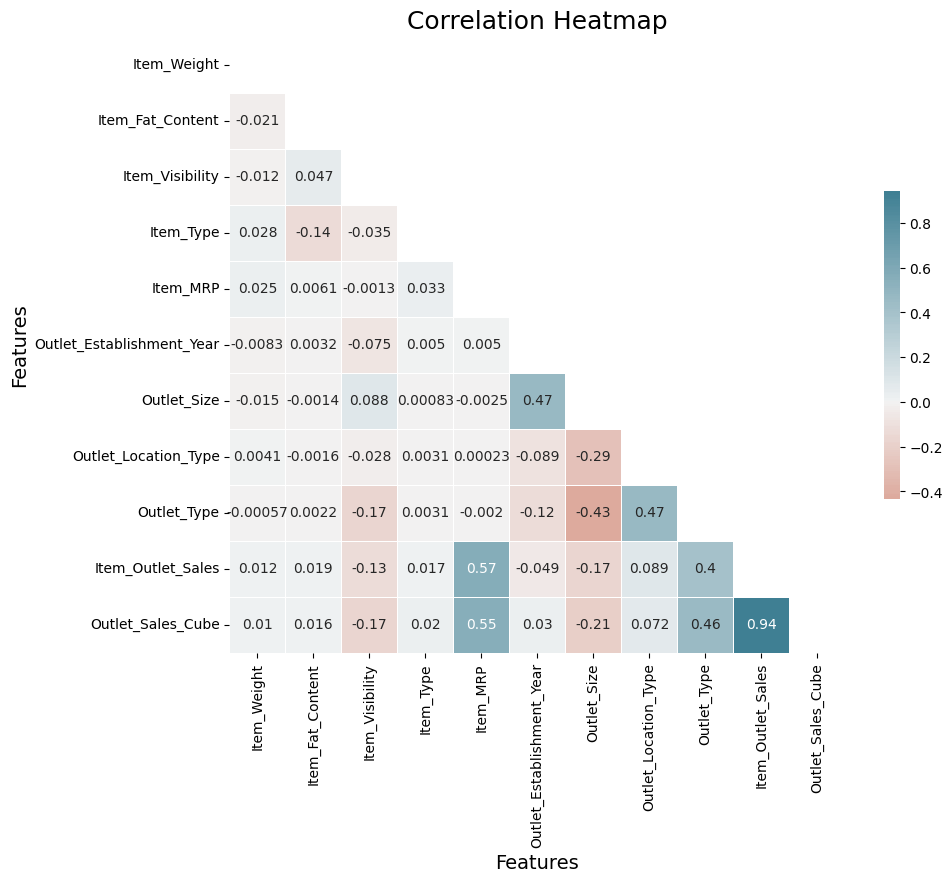

In [313]:
# Subset the dataset to include only the relevant columns
subset = train[['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP',
             'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
             'Item_Outlet_Sales','Outlet_Sales_Cube']]

# Calculate the correlation matrix
corr = subset.corr()

# Create a mask for the upper triangle of the heatmap
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the figure and axis objects
fig, ax = plt.subplots(figsize=(10, 8))

# Generate the heatmap with green and white colors
sns.heatmap(corr, mask=mask, annot=True, cmap=sns.diverging_palette(20, 220, n=200),
            center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Set the title and labels for the plot
ax.set_title("Correlation Heatmap", fontsize=18)
ax.set_xlabel("Features", fontsize=14)
ax.set_ylabel("Features", fontsize=14)

# Show the plot
plt.show()

#FEATURE ENGINEERING

In [314]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Sales_Cube,Outlet_Sales_square
0,156,9.30,0,0.016047,4,249.8092,9,1999,1.0,0,1,3735.1380,15.515611,61.115775
1,8,5.92,1,0.019278,14,48.2692,3,2009,1.0,2,2,443.4228,7.625576,21.057607
2,662,17.50,0,0.016760,10,141.6180,9,1999,1.0,0,1,2097.2700,12.800240,45.795961
3,1121,19.20,1,0.000000,6,182.0950,0,1998,3.0,2,0,732.3800,9.013888,27.062520
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0.0,2,1,994.7052,9.982319,31.538947


In [315]:
train['Outlet_Age']=train['Outlet_Establishment_Year'].apply(lambda year:2024-year)

In [316]:
train.head()
#Display the first five rows of the 'train' DataFrame

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Sales_Cube,Outlet_Sales_square,Outlet_Age
0,156,9.30,0,0.016047,4,249.8092,9,1999,1.0,0,1,3735.1380,15.515611,61.115775,25
1,8,5.92,1,0.019278,14,48.2692,3,2009,1.0,2,2,443.4228,7.625576,21.057607,15
2,662,17.50,0,0.016760,10,141.6180,9,1999,1.0,0,1,2097.2700,12.800240,45.795961,25
3,1121,19.20,1,0.000000,6,182.0950,0,1998,3.0,2,0,732.3800,9.013888,27.062520,26
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0.0,2,1,994.7052,9.982319,31.538947,37


In [317]:
# These columns are dropped as they are not necessary for the analysis or modeling
train=train.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size','Item_Weight','Outlet_Sales_square'],axis=1)

In [318]:
train=train.drop(['Item_Visibility','Item_Outlet_Sales'],axis=1)
# Dropping 'Item_Visibility' and 'Item_Outlet_Sales' columns

In [319]:
# Display the first five rows of the 'train' DataFrame
train.head()

,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Location_Type,Outlet_Type,Outlet_Sales_Cube,Outlet_Age
0,0,4,249.8092,0,1,15.515611,25
1,1,14,48.2692,2,2,7.625576,15
2,0,10,141.6180,0,1,12.800240,25
3,1,6,182.0950,2,0,9.013888,26
4,0,9,53.8614,2,1,9.982319,37


In [320]:
# Import StandardScaler from sklearn.preprocessing for feature standardization
# StandardScaler will be used to standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler

In [321]:
# Define the feature variables (X) and the target variable (y) for the model
# 'x' contains the feature columns: 'Item_Fat_Content', 'Item_Type', 'Item_MRP', 'Outlet_Location_Type', 'Outlet_Type', 'Outlet_Age'
# 'y' contains the target column 'Outlet_Sales_cube' which is the variable we want to predict
x=train[['Item_Fat_Content','Item_Type','Item_MRP','Outlet_Location_Type','Outlet_Type','Outlet_Age']]
y=train['Outlet_Sales_Cube']

In [322]:
x.shape

(8523, 6)

In [323]:
# Create an instance of StandardScaler for feature standardization
# This scaler will be used to normalize the features by removing the mean and scaling to unit variance
scalar=StandardScaler()

In [324]:
# Standardize the feature variables 'x' using the StandardScaler
# This scales the features to have a mean of 0 and a standard deviation of 1
x=scalar.fit_transform(x)

In [325]:
# Convert the standardized NumPy array 'x' back to a pandas DataFrame with original column names
x=pd.DataFrame(x)

In [326]:
#display the 'x'
print(x)

             0         1         2         3         4         5
0    -0.738147 -0.766479  1.747454 -1.369334 -0.252658 -0.139541
1     1.354743  1.608963 -1.489023  1.091569  1.002972 -1.334103
2    -0.738147  0.658786  0.010040 -1.369334 -0.252658 -0.139541
3     1.354743 -0.291391  0.660050  1.091569 -1.508289 -0.020085
4    -0.738147  0.421242 -1.399220  1.091569 -0.252658  1.293934
...        ...       ...       ...       ...       ...       ...
8518 -0.738147  1.371418  1.180783  1.091569 -0.252658  1.293934
8519  1.354743 -1.716656 -0.527301 -0.138882 -0.252658 -0.497909
8520 -0.738147  0.183698 -0.897208 -0.138882 -0.252658 -0.736822
8521  1.354743  1.371418 -0.607977  1.091569  1.002972 -1.334103
8522 -0.738147  1.608963 -1.052261 -1.369334 -0.252658  0.099372

[8523 rows x 6 columns]


In [327]:
x=pd.DataFrame(x)

In [328]:
# Display the first five rows of the 'train' DataFrame
x.head()

,0,1,2,3,4,5
0,-0.738147,-0.766479,1.747454,-1.369334,-0.252658,-0.139541
1,1.354743,1.608963,-1.489023,1.091569,1.002972,-1.334103
2,-0.738147,0.658786,0.010040,-1.369334,-0.252658,-0.139541
3,1.354743,-0.291391,0.660050,1.091569,-1.508289,-0.020085
4,-0.738147,0.421242,-1.399220,1.091569,-0.252658,1.293934


In [329]:
#display the type'x'coloum
print(type(x))

<class 'pandas.core.frame.DataFrame'>


In [330]:

# Display the first five rows of the 'test' DataFrame
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750000,0,0.007565,13,107.8622,9,1999,1.0,0,1
1,1067,8.300000,1,0.038428,4,87.3198,2,2007,3.0,1,1
2,1406,14.600000,0,0.099575,11,241.7538,0,1998,3.0,2,0
3,809,7.315000,0,0.015388,13,155.0340,2,2007,3.0,1,1
4,1184,12.695633,1,0.118599,4,234.2300,5,1985,1.0,2,3


In [331]:

# Calculate and add the 'Outlet_Age' column by subtracting 'Outlet_Establishment_Year' from the current year (2024)
test['Outlet_Age']=test['Outlet_Establishment_Year'].apply(lambda year:2024-year)

In [332]:

# Display the first five rows of the 'test' DataFrame
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age
0,1103,20.750000,0,0.007565,13,107.8622,9,1999,1.0,0,1,25
1,1067,8.300000,1,0.038428,4,87.3198,2,2007,3.0,1,1,17
2,1406,14.600000,0,0.099575,11,241.7538,0,1998,3.0,2,0,26
3,809,7.315000,0,0.015388,13,155.0340,2,2007,3.0,1,1,17
4,1184,12.695633,1,0.118599,4,234.2300,5,1985,1.0,2,3,39


In [333]:
# Drop the specified columns from the 'test' DataFrame
# These columns are removed as they are not needed for the analysis or prediction
test=test.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size','Item_Weight',],axis=1)

In [334]:
# Drop the 'Item_Visibility' column from the 'test' DataFrame
# This column is removed as it is not needed for the analysis or prediction
test = test.drop(['Item_Visibility'], axis=1)

In [335]:
# Display the first five rows of the 'test' DataFrame to inspect its structure and contents
test.head()

,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Location_Type,Outlet_Type,Outlet_Age
0,0,13,107.8622,0,1,25
1,1,4,87.3198,1,1,17
2,0,11,241.7538,2,0,26
3,0,13,155.0340,1,1,17
4,1,4,234.2300,2,3,39


In [336]:
# Import the StandardScaler class from sklearn.preprocessing for feature standardization
# StandardScaler will be used to normalize features by removing the mean and scaling them to unit variance
from sklearn.preprocessing import StandardScaler

In [337]:
# These columns include 'Item_Fat_Content', 'Item_Type', 'Item_MRP', 'Outlet_Location_Type', 'Outlet_Type', and 'Outlet_Age'
x_test=test[['Item_Fat_Content','Item_Type','Item_MRP','Outlet_Location_Type','Outlet_Type','Outlet_Age']]

In [338]:
# Print the shape of the 'x_test' DataFrame or array to see its dimensions
x_test.shape

(5681, 6)

In [339]:
# Initialize a StandardScaler object for feature standardization
scalar=StandardScaler()

In [340]:
# Standardize the test data 'x_test' using the previously fitted StandardScaler
x_test=scalar.fit_transform(x_test)

In [341]:
# Convert the 'x_test' data into a pandas DataFrame
# This allows for easier manipulation and access to DataFrame features
x_test=pd.DataFrame(x_test)

In [342]:
# Print the contents of the 'x_test' variable to inspect the test data
print(x_test)

             0         1         2         3         4         5
0    -0.740811  1.366916 -0.536555 -1.369215 -0.252769 -0.139891
1     1.349873 -0.766450 -0.868937 -0.138827 -0.252769 -1.095512
2    -0.740811  0.892835  1.629848  1.091560 -1.507994 -0.020438
3    -0.740811  1.366916  0.226697 -0.138827 -0.252769 -1.095512
4     1.349873 -0.766450  1.508110  1.091560  2.257683  1.532446
...        ...       ...       ...       ...       ...       ...
5676  1.349873  1.366916  0.004727 -1.369215 -0.252769  0.099015
5677  1.349873  1.840998  0.455014  1.091560  1.002457 -1.334417
5678 -0.740811  0.181713 -0.360485 -0.138827 -0.252769 -0.498248
5679  1.349873 -1.003490  1.190844 -0.138827 -0.252769 -1.095512
5680  1.349873 -1.003490 -0.990674 -0.138827 -0.252769 -0.498248

[5681 rows x 6 columns]


In [343]:
#Display the first five rows of the data sets
x_test.head()

,0,1,2,3,4,5
0,-0.740811,1.366916,-0.536555,-1.369215,-0.252769,-0.139891
1,1.349873,-0.766450,-0.868937,-0.138827,-0.252769,-1.095512
2,-0.740811,0.892835,1.629848,1.091560,-1.507994,-0.020438
3,-0.740811,1.366916,0.226697,-0.138827,-0.252769,-1.095512
4,1.349873,-0.766450,1.508110,1.091560,2.257683,1.532446


In [344]:
# Print the type of the variable 'x' to check its data structure
print(type(x))

<class 'pandas.core.frame.DataFrame'>


Model Building

In [345]:
# Import the LinearRegression class from sklearn.linear_model for creating a linear regression model
from sklearn.linear_model import LinearRegression

In [348]:
# For evaluating the models using the metrics
from sklearn.metrics import r2_score as R2
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.model_selection  import cross_val_score as CVS

In [349]:
# Define the linear regression model
lr = LinearRegression()

# Train the model on the training data
lr.fit(x, y)

# Precting the model using the test set
y_predict = lr.predict(x)

# Evaluating the training set with the metric values

print("R-Square value on the training set: = ", lr.score(x,y))
print("----------------------------------------------------------------------------------------------")

# Use cross-validation to get the R-squared score
scores = CVS(lr, x, y, cv=5)
print('CV R-squared scores:', scores,"\n")
print('Average CV R-squared score:', np.mean(scores),"\n")

R-Square value on the training set: =  0.5479170954222314
----------------------------------------------------------------------------------------------
CV R-squared scores: [0.55720549 0.56274019 0.52765011 0.53782978 0.54762596] 

Average CV R-squared score: 0.5466103056990158 



In [350]:
# Import the pickle module for serializing and deserializing Python objects
import pickle

In [351]:
# Define the filename for saving the model
Bigmart = "Bigmart_Analysis.sav"

# Serialize the trained model 'lr' and save it to the file 'Bigmart_Analysis.sav'
pickle.dump(lr, open(Bigmart, 'wb'))